# greek letter

* delta d-call/d-stock call相對stock的變化率 正相關 
* gamma d-delta/d-stock 
* vega d-call/d-violation 波動率越高者價值越高 
* theta d-call/d-time 時間越長time value越高 
* rho d-call/d-interest rate


# delta hedge

if 擁有20 stock <br>
delta=10<br>
要賣20/10=2 call


# Monte Carol

t=T/N<br>
S0->S0+t->S0+2t->...->ST 推無數次<br>
然後得到ST的distribution<br>
然後求期望值

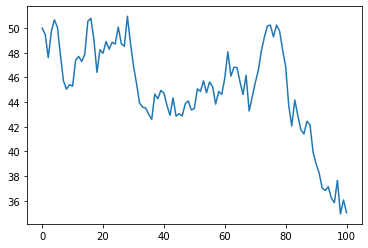

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def MCsim(S,T,r,vol,N):
    dt = T/N
    St = np.zeros((N+1))
    St[0]=S
    for i in range (N):
        St[i+1]=St[i]*math.exp((r-0.5*vol*vol)*dt+vol*np.random.normal()*math.sqrt(dt))
    return St
S = 50
K = 40
r = 0.08
T = 2
vol = 0.2
Sa = MCsim(S,T,r,vol,100)
plt.plot(Sa)


In [3]:
def MCcall(S,T,r,vol,K,N,M):
    c=0
    S_all = np.zeros((M,N+1))
    for m in range(M):
        Sa= MCsim(S,T,r,vol,100)
        S_all[m][:]=Sa
        if(Sa[-1]>K):
            c+=(Sa[-1]-K) #高於履約價才有效
    #plt.plot(S_all.T)
    return c/M*math.exp(-r*T) #期望值折現
S = 50
K = 40
r = 0.08
T = 2
vol = 0.2
N=100
M=10000
print(MCcall(S,T,r,vol,K,N,M))

16.33113020806278


# Binomial Model 

每一步都有漲跌<br>
先漲再跌跟先跌再漲一樣

In [5]:
def BinTreeCall(S,T,r,vol,K,N):
    dt = T/N
    u = math.exp(vol*math.sqrt(dt))
    d = math.exp(-vol*math.sqrt(dt))
    p = (math.exp(r*dt)-d)/(u-d)
    price = np.zeros((N+1,N+1))
    price[0][0]=S
    prob = np.zeros((N+1,N+1))
    prob[0][0]=1
    c=0
    for R in range(1,N+1):
        price[0][R]=price[0][R-1]*u
        prob[0][R]=prob[0][R-1]*p
        for C in range(1,R):
            price[C][R]=price[C-1][R-1]*d
            prob[C][R]=prob[C-1][R-1]*(1-p)+prob[C][R-1]*p
        prob[R][R]=prob[R-1][R-1]*(1-p)
    for R in range(N+1):
        if(price[R][N]>K):
            c+=(price[R][N]-K)*prob[R][N]
    return c*math.exp(-r*T)
S = 50
K = 40
r = 0.08
T = 2
vol = 0.2
N=100
BinTreeCall(S,T,r,vol,K,N)

16.380141010477193